In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [6]:
# Load in the full dataset
df = pd.read_csv("encoded_data.csv")

# Make a copy of the full dataset this is the one we will manipulate while still retaining the full original data
df_subset = df
Just_AI_Satisfaction = df_subset['AI_Satisfaction']
df_subset = df_subset.drop('AI_Satisfaction', axis=1) 
df_subset['AI_Satisfaction'] = Just_AI_Satisfaction

df_subset.head()


,Country,Age,Annual_Salary,Gender,Education,Payment_Method_Credit_Debit,Living_Region,Online_Service_Preference,AI_Enhance_Experience,AI_Tools_Used_Chatbots,...,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,AI_Trust,AI_Usage,AI_Satisfaction
0,165,2,3,0,3,0,1,0,1,1,...,1,0,1,1,1,1,1,2,3,1
1,165,1,1,1,2,1,1,0,1,1,...,1,1,1,1,0,0,0,2,3,1
2,165,2,3,1,2,1,11,1,1,0,...,1,1,1,1,1,0,0,2,1,1
3,165,2,4,1,2,1,11,1,1,0,...,1,1,1,1,1,0,1,2,0,1
4,165,1,1,1,2,0,11,1,1,1,...,1,1,1,0,1,0,1,2,1,1


In [7]:
# Splitting the data to get the features in one and the target variable in another 
X = df_subset.iloc[:, :-1].values  # The features are all the columns except the last one
y = df_subset.iloc[:, -1].values   # Target column which was changed to the last column


In [8]:
# This chunk standardizes the data 
# This is important because for both PCA and LDA, they are sensitive to the scale of the data. 
# And since we have a column with larger numbers (Country and Living Region) it needs to be scaled and adjusted.
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)


In [9]:
# This chunk applies the LDA from the sklearn library we use two components to make it easier for graphing
# df_Subset_Scaled.shape[0] represents a place holder for the target to make it unsupervised.

# Get the number of classes and features
n_classes = len(np.unique(y))
n_features = X_Scaled.shape[1]


# Apply LDA with the adjusted number of components
lda = LinearDiscriminantAnalysis(n_components = 1)
df_Subset_LDA = lda.fit_transform(X_Scaled, y)



In [10]:
# Apply decision threshold at 0
# Assign class 1 if LDA value is greater than 0, else assign class 0
predictions = np.where(df_Subset_LDA[:, 0] > 0, 1, 0)

# Add the predicted class as a new column to the dataframe
df_subset['LDA_Prediction'] = predictions


LDA components shape: (634, 1)
Explained Variance Ratio: [1.]


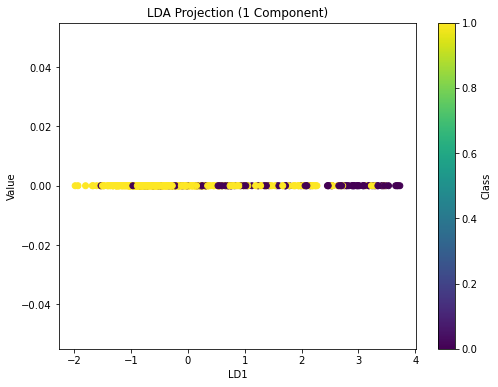

In [11]:
print(f"LDA components shape: {df_Subset_LDA.shape}")
print(f"Explained Variance Ratio: {lda.explained_variance_ratio_}")

plt.figure(figsize=(8, 6))
plt.scatter(df_Subset_LDA[:, 0], np.zeros_like(df_Subset_LDA[:, 0]), c=y, cmap='viridis')
plt.title('LDA Projection (1 Component)')
plt.xlabel('LD1')
plt.ylabel('Value')
plt.colorbar(label='Class')
plt.show()

In [12]:
#from os import read
# Export DataFrame to CSV
#df_subset.to_csv('FE_final2_data.csv', index=False)